###HW2 Python part
1. Variogram
2. Clustering

**Part 1. Variogram. Please refer to the HW2 word document for the questions.**

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from pprint import pprint

Run the following cell to install the scikit-gstat library, which is needed in this homework. This is necessary to import the "skgstat library (otherwise you will receive an error)

Note that Google CoLab by default restores the environment after the session, so you may need to reinstall it the next time you use Colab.

In [2]:
%pip install scikit-gstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive 
drive.mount('/content/drive')

%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [4]:
#import the library, which includes various geostatistics functions
import skgstat as skg

Generate and visualize data by running the following two cells

**The data is provided to you in this question and you do not need to change the data; just run the following two cells to load and visualize the data**

In [5]:
#get a sample data from the library
#coords: x,y locations of points
#vals: value at each point
#N here controls the total number of points
N = 400
coords, vals = skg.data.pancake(N=N).get('sample')

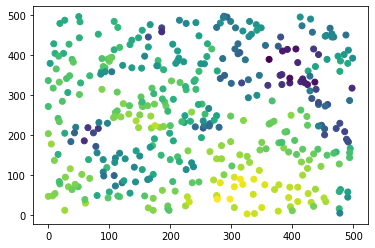

In [6]:
#visualize the spatial distribution and values of points
plt.scatter(coords[:,0], coords[:,1], c=vals.reshape((N,1)))

Get the variogram plot, recall the three key concepts: nugget, sill, and range

Recall that we need bins to calculate variogram

The number of bins here is set by "n_lags"

*It sometimes print two duplicated figures (only need to use one of them if that happens)*

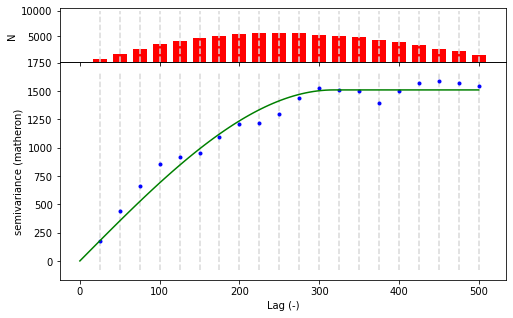

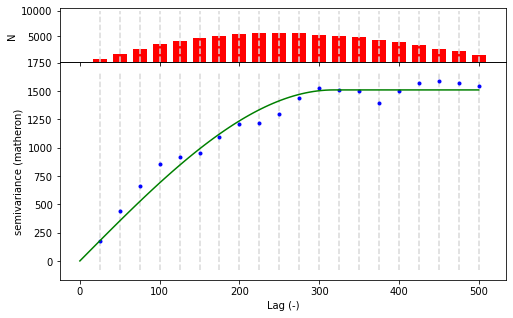

In [7]:
#get variogram plot
V = skg.Variogram(coords, vals, n_lags=20)
#maximum distance to consider
V.maxlag = 500

V.plot()

**Part 2: Clustering**

Refer to the four questions in HW2, and follow the instructions to design and create four simple datasets to constrast between different clustering algorithms.

In [8]:
#import packages
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Similar to variogram package, here you will need to install HDBSCAN first by running the following cell before being able to import it as a package

In [9]:
%pip install hdbscan
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import hdbscan
#installation guide available in: https://github.com/scikit-learn-contrib/hdbscan

#import other clustering packages/functions
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [11]:
#run this cell to load visualization function
def display_data_or_cluster(data, cluster_labels = None):
    '''
    if you need to visualize data, ignore the second input;
    if you need to visualize clusters, feed in both data and cluster_labels
    '''
    if cluster_labels is None:
        plt.scatter(data, np.zeros(data.shape), s=10)#, alpha=0.25
    else:
        #setting colors
        color_palette = sns.color_palette('deep', 20)
        cluster_colors = [color_palette[x] if x >= 0
                        else (0.75,0.75, 0.75)#(1,1,1)
                        for x in cluster_labels]
        plt.scatter(data, np.zeros(data.shape), s=10, c=cluster_colors)#, alpha=0.25
    
    plt.xlim([-10, 103])

**Dataset creation instructions copied from HW2:** For each dataset, you will place 20 to 30 points (choose yourself) in a one dimensional range [0,100]. For simplicity, you can use an integer value for each point in [0,100] and the 20 points should all have different values. Put the numbers in the array that are marked in the notebook, and run the clustering algorithm on it to get result. You should place the points in a way so that the true clusters are visually apparent. Hint: Draw the data on a paper first to think about what results you might get before putting the numbers into the program, which can help save some efforts.

In [12]:
#create dataset 1, 2, 3 and 4 for the four questions in HW2
example = [1,5,9,13,17,21,25,29,33,37,41,45,49,53,57,61,65,69,73,77]

#put your point coordinates (1D) in the following arrays (refer to the example above), min coordinate: 1, max: 100
data1 = [3,6,9,12,15,18,21,24,27,30,33,55,56,57,58,59,60,61,62,63,64,77,82,87,92,97]
data2 = [5,6,7,8,9,10,11,12,13,14,15,16,18, 21,24,27,30,33,36,39,42,45, 47,52,57,62,67,72,77]
data3 = [1,2,3,4,5,6,7,8,9,10, 19,25,30, 50,51,52,53,54,55,56,57,75,80,85 ]
data4 = [4,5,6,7,8,9,10,11,12,13,14,15,38,42,46,50,54,58,85]

select and display data: you should see your data points appearing as a line (all y values are 0)

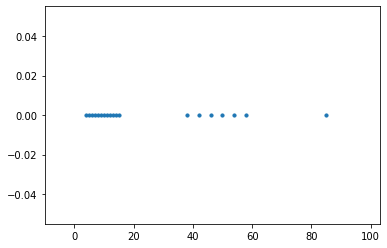

In [13]:
#select which dataset to use, replace "example" with the dataset name (e.g., "data1") in the parenthesis; the following example uses data1
data = np.array(data4).reshape(-1,1)
display_data_or_cluster(data)

After specifying dataset using the above cell, run the following cells to get the clustering results of any of the four clustering algorithm

**k-means**

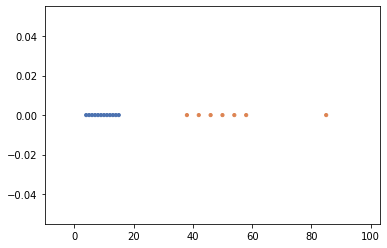

In [14]:
clusterer = KMeans(n_clusters=2).fit(data)
display_data_or_cluster(data, clusterer.labels_)

**EM (or Gaussian mixture model)**

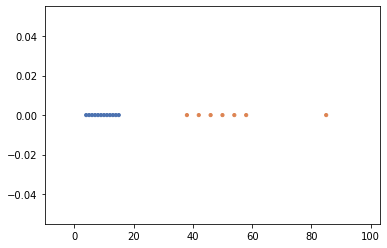

In [15]:
em = GaussianMixture(n_components=2).fit(data)
display_data_or_cluster(data, em.predict(data))

**DBSCAN**: if you see gray-colored points, those are considered as noise points by DBSCAN

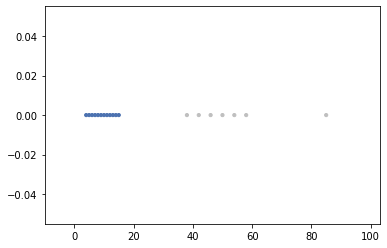

In [16]:
clusterer = DBSCAN(eps=2, min_samples=2).fit(data)
display_data_or_cluster(data, clusterer.labels_) 

**HDBSCAN**: if you see gray-colored points, those are considered as noise points by HDBSCAN

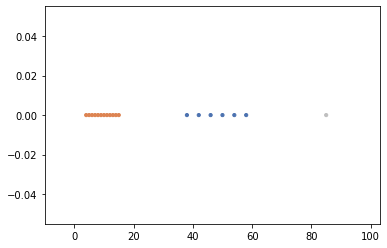

In [17]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5).fit(data)
display_data_or_cluster(data, clusterer.labels_)